In [60]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

e = 2.7182818284590452353602874713527
 
#Ejericico a
a = 0
b = 1
m = 2
h = 0.1
N = int((b-a)/h)+1
al = [0, 0]
def f(r, t, x):
    if r == m-1:
        return t*e**t - t + 2*x[1] - x[0]
    else:
        return x[r+1]
x = np.arange(a, b, 0.0001)
def y(x):
    return (1/6)*(x**3)*(e**x) - x*e**x + 2*e**x - x -2
yy = y(x)
    
k = np.zeros((4, m))
w = np.zeros((N, m))
t = np.zeros(N)
aux = np.zeros(m)

t[0] = a

#STEP 2
for i in range(m):
    w[0][i] = al[i]

#STEP 4
for i in range(N):
    #STEP 5
    for j in range(m):
        for g in range(m):
            aux[g] = w[i][g]
        k[0][j] = h*f(j, t[i], aux)
        
    #STEP 6
    for j in range(m):
        for g in range(m):
            aux[g] = w[i][g] + (1/2)*k[0][g]
        k[1][j] = h*f(j, t[i]+h/2, aux)
        
    #STEP 7
    for j in range(m):
        for g in range(m):
            aux[g] = w[i][g] + (1/2)*k[1][g]
        k[2][j] = h*f(j, t[i]+h/2, aux)
        
    #STEP 8
    for j in range(m):
        for g in range(m):
            aux[g] = w[i][g] + k[2][g]
        k[3][j] = h*f(j, t[i]+h, aux)
        
    #STEP 9
    if i+1 < N:
        for j in range(m):
            w[i+1][j] = w[i][j] + (1/6)*(k[0][j] + 2*k[1][j] + 2*k[2][j] + k[3][j])
        t[i+1] = a + (i+1)*h

Text(0.5, 1.0, 'Ejercicio A')

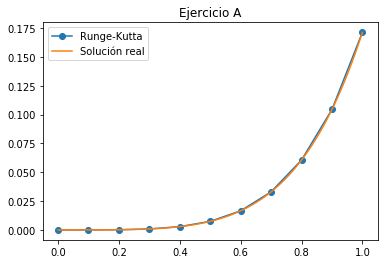

In [61]:
jelp = np.zeros(N)
for i in range(N):
    jelp[i] = w[i][0]

#Grafico la aprox por Runge-Kutta
plt.plot(t, jelp, "o-", label="Runge-Kutta")

#Grafico solución real 
plt.plot(x, yy, "-", label="Solución real")

#Agrego etiquetas de la grafica
plt.legend(loc = "upper left")
plt.title("Ejercicio A")

In [62]:
print("Runge-Kutta error \n N \t\t t_i \t\t w_i \t\t y_i \t\t Error")
for i in range(N):
    print("{:.6f} \t {:.6f} \t {:.6f} \t {:.6f} \t {:.6f}".format(i+1, t[i], w[i][0], y(t[i]), abs(w[i][0]-y(t[i]))))

Runge-Kutta error 
 N 		 t_i 		 w_i 		 y_i 		 Error
1.000000 	 0.000000 	 0.000000 	 0.000000 	 0.000000
2.000000 	 0.100000 	 0.000009 	 0.000009 	 0.000000
3.000000 	 0.200000 	 0.000154 	 0.000154 	 0.000000
4.000000 	 0.300000 	 0.000834 	 0.000834 	 0.000000
5.000000 	 0.400000 	 0.002832 	 0.002832 	 0.000000
6.000000 	 0.500000 	 0.007430 	 0.007430 	 0.000001
7.000000 	 0.600000 	 0.016561 	 0.016563 	 0.000001
8.000000 	 0.700000 	 0.032996 	 0.032998 	 0.000002
9.000000 	 0.800000 	 0.060559 	 0.060562 	 0.000003
10.000000 	 0.900000 	 0.104401 	 0.104405 	 0.000004
11.000000 	 1.000000 	 0.171322 	 0.171329 	 0.000007
